**Time Series focasting using FB PROPHET LIBRARY**

In [2]:
#installing the package
!pip install fbprophet # this is the model package  to be used
!pip install pystan
!pip install yfinance # for loading the dataset to be used. data can be loaded normally thus no need to install this package.

In [3]:
#load libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import fbprophet
%matplotlib inline
import yfinance as yf

In [4]:
#read time series data from Yahoo Finance by yfinance
HSI = yf.Ticker("^HSI") 
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2021,9,5)
hist = HSI.history(start=start, end=end, auto_adjust=True)
hist
#if import data via url: 
url="https://query1.finance.yahoo.com/v7/finance/download/^HSI?period1=1420066800&period2=1622437200&interval=1d&events=history&crumb=tO1hNZoUQeQ"  


In [5]:
data=pd.read_csv(url)
data[:5]

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,23699.199219,23998.900391,23655.500000,23721.300781,23721.300781,1.801713e+09
1,2015-01-05,23699.189453,23998.869141,23655.519531,23721.320313,23721.320313,2.585193e+09
2,2015-01-06,23515.130859,23611.000000,23312.500000,23485.410156,23485.410156,2.617977e+09
3,2015-01-07,23396.699219,23715.710938,23332.029297,23681.259766,23681.259766,2.181070e+09
4,2015-01-08,23920.349609,23941.640625,23719.050781,23835.529297,23835.529297,2.011643e+09


In [6]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1576,2021-05-25,28461.500000,28929.240234,28461.500000,28910.859375,28910.859375,2.352078e+09
1577,2021-05-26,29056.279297,29261.859375,29027.949219,29166.009766,29166.009766,2.518538e+09
1578,2021-05-27,28998.390625,29157.949219,28950.720703,29113.199219,29113.199219,3.804955e+09
1579,2021-05-28,29219.460938,29336.130859,29033.720703,29124.410156,29124.410156,2.591560e+09
1580,2021-05-31,29225.460938,29225.460938,28909.519531,29151.800781,29151.800781,2.188581e+09


In [7]:
#checking for null values
data.isna().sum()

Date         0
Open         3
High         3
Low          3
Close        3
Adj Close    3
Volume       3
dtype: int64

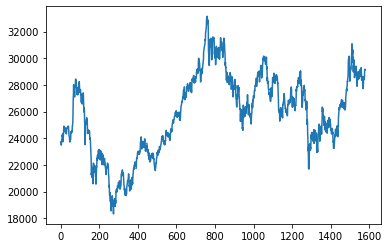

In [8]:
data["Close"].plot();

In [9]:
data.dropna(inplace=True)
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### For fbprophet to work, it require renaming of the column i.e ds for date and y for target variable

In [10]:
#show the data table in Date, Stock Price (Close)
data_df= data[["Date", "Close"]]
data_df.head()

,Date,Close
0,2015-01-02,23721.300781
1,2015-01-05,23721.320313
2,2015-01-06,23485.410156
3,2015-01-07,23681.259766
4,2015-01-08,23835.529297


In [11]:
#renaming columns ds and y as required by the fbprophet.
data_df.columns=["ds", "y"]
data_df.head()

,ds,y
0,2015-01-02,23721.300781
1,2015-01-05,23721.320313
2,2015-01-06,23485.410156
3,2015-01-07,23681.259766
4,2015-01-08,23835.529297


In [12]:
#changing date/ds to datetime
from datetime import datetime
data_df["ds"] = pd.to_datetime(data_df["ds"])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1580
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1578 non-null   datetime64[ns]
 1   y       1578 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 37.0 KB


In [14]:
#importing prophet

from fbprophet import Prophet


In [15]:
#checking the function in the prophet package

dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

## Modeling

In [16]:
#Initializing the model

model=Prophet()

In [17]:
#fitting the model
model.fit(data_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
#checking on which seasonality the model was build on
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [19]:
#creating future 365 dates to focast

future_dates= model.make_future_dataframe(periods=365)

#checking 
future_dates.tail()



,ds
1938,2022-05-27
1939,2022-05-28
1940,2022-05-29
1941,2022-05-30
1942,2022-05-31


In [20]:
#making predictions on future dates
pred= model.predict(future_dates)
pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1938,2022-05-27,31452.891893,22292.941929,39677.987547,22704.448158,39590.337607,-153.103736,-153.103736,-153.103736,-89.620906,-89.620906,-89.620906,-63.482830,-63.482830,-63.482830,0.0,0.0,0.0,31299.788157
1939,2022-05-28,31461.341276,22808.924070,39826.874749,22695.167101,39624.328518,115.706832,115.706832,115.706832,172.418440,172.418440,172.418440,-56.711608,-56.711608,-56.711608,0.0,0.0,0.0,31577.048108
1940,2022-05-29,31469.790659,22496.750701,39781.539547,22651.727547,39658.319430,123.803812,123.803812,123.803812,172.418406,172.418406,172.418406,-48.614594,-48.614594,-48.614594,0.0,0.0,0.0,31593.594471
1941,2022-05-30,31478.240042,22373.563627,39493.672089,22608.287993,39694.205563,-126.900815,-126.900815,-126.900815,-87.304436,-87.304436,-87.304436,-39.596379,-39.596379,-39.596379,0.0,0.0,0.0,31351.339227
1942,2022-05-31,31486.689425,22444.798176,39668.351925,22564.848439,39735.615834,-78.631808,-78.631808,-78.631808,-48.556048,-48.556048,-48.556048,-30.075760,-30.075760,-30.075760,0.0,0.0,0.0,31408.057617


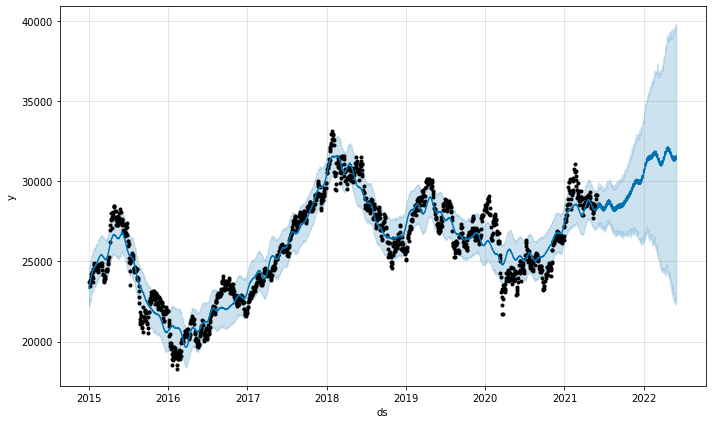

In [21]:
#plotting the prediction
visualize_model=model.plot(pred)## assign the model to avoid plotting the visual in double

Observation: 
* The dotted line are the real data.
* Dark Blue line, are the projections
* light blue are the trend space.

* The point without real data are the future prediction for the next one year.

In [22]:
#we can predict confidence interval only
pred.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

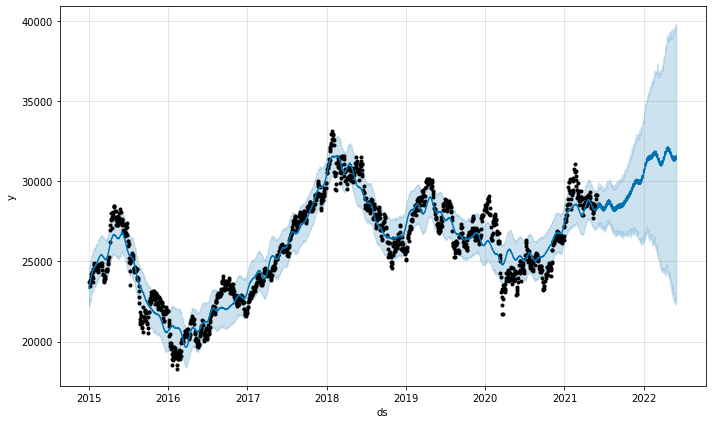

In [23]:
#specifying the column needed
focasting= pred[['ds', 'yhat_lower','yhat_upper', 'yhat' ]]
visualize_model=model.plot(focasting);

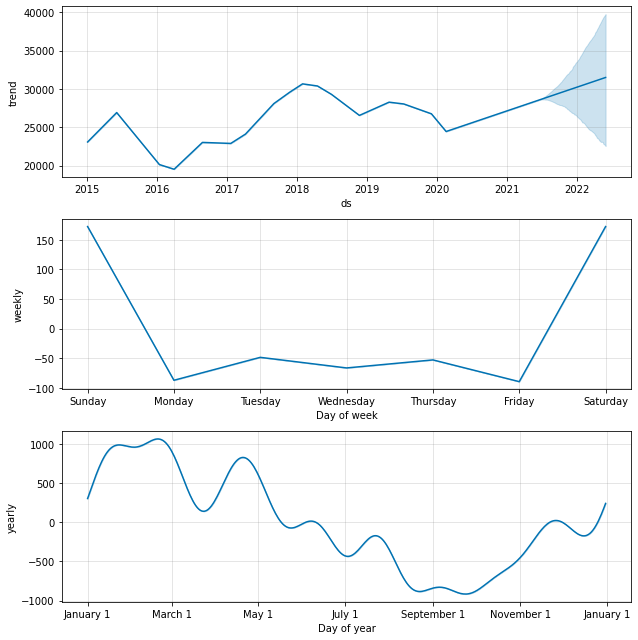

In [24]:
#checking trend and weekly. monthly and yearly prediction

model.plot_components(pred);

### Cross Validation

in time series, the data is sequential and thus cross validation is done differently.

In above case where our data is frm 2015 to 2021, we can take;
 2015-2020 data as our training dataset
 2020-2021 data as our test data
 2021-2022 is  validation dataset.. completely new dataset used for prediction.
 

In [25]:
#show all the forecasting values in a table
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pred[["ds", "yhat", "yhat_lower", "yhat_upper"]][:10]

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-02,23324.527271,22184.700473,24500.161087
1,2015-01-05,23556.847463,22320.121778,24789.226088
2,2015-01-06,23671.291784,22527.994296,24788.445066
3,2015-01-07,23727.841883,22470.460133,24930.222977
4,2015-01-08,23814.207311,22634.711276,25040.634390
5,2015-01-09,23848.218775,22543.127974,25073.539504
6,2015-01-12,24047.061537,22860.188467,25212.943187
7,2015-01-13,24145.196490,22893.122098,25340.562633
8,2015-01-14,24183.299261,23017.780144,25311.629019
9,2015-01-15,24249.396913,23135.131409,25432.395350


In [26]:
#we can use fpprophet cross validation inbuild function

from fbprophet.diagnostics import cross_validation

data_cv = cross_validation(model, initial="730 days", period="180 days", horizon="365 days")
data_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2017-06-16 00:00:00 and 2020-05-31 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-19,25322.013005,24610.679626,26010.792774,25924.550781,2017-06-16
1,2017-06-20,25280.149007,24592.995227,26001.256659,25843.039063,2017-06-16
2,2017-06-21,25226.889415,24499.347388,25902.117569,25694.580078,2017-06-16
3,2017-06-22,25217.494138,24500.391276,25908.915231,25674.529297,2017-06-16
4,2017-06-23,25146.929651,24490.011531,25754.661412,25670.050781,2017-06-16


In [27]:
#cheking the tail
data_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1718,2021-05-25,19896.003845,11279.300177,27299.380629,28910.859375,2020-05-31
1719,2021-05-26,19873.043250,11355.552390,27311.606492,29166.009766,2020-05-31
1720,2021-05-27,19897.195263,11239.994555,27353.747105,29113.199219,2020-05-31
1721,2021-05-28,19888.535039,11318.794112,27234.446696,29124.410156,2020-05-31
1722,2021-05-31,19941.102309,11096.933471,27347.094941,29151.800781,2020-05-31


Observation: 
* initial days= today number of days we want (2*horizon days)
* period= half of the the horizon days (horizon/2)# u can give a better nearest number.
* horizon= total number of days to be predicted


the output is ds, yhat, yhat_lower, yhat_upper, y and cutoff.


In [28]:
#show all the forecasting and predicted forecasted values in a table
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
data_cv[["ds", "y", "yhat"]]. head(20)

,ds,y,yhat
0,2017-06-19,25924.550781,25322.013005
1,2017-06-20,25843.039063,25280.149007
2,2017-06-21,25694.580078,25226.889415
3,2017-06-22,25674.529297,25217.494138
4,2017-06-23,25670.050781,25146.929651
5,2017-06-26,25871.890625,25059.084094
6,2017-06-27,25839.990234,25030.032936
7,2017-06-28,25683.500000,24991.759559
8,2017-06-29,25965.419922,24999.297927
9,2017-06-30,25764.580078,24947.399728


In [29]:
#checking perfomance metrics
from fbprophet.diagnostics import performance_metrics

data_p = performance_metrics(data_cv)
data_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,2.557882e+06,1599.338038,1345.961840,0.048044,0.043468,0.331395
1,39 days,2.710015e+06,1646.212236,1398.916337,0.049974,0.046065,0.302326
2,40 days,2.888591e+06,1699.585592,1453.806383,0.051867,0.048275,0.273256
3,41 days,3.085601e+06,1756.587917,1505.279013,0.053547,0.049225,0.248837
4,42 days,3.302716e+06,1817.337537,1557.092169,0.055203,0.049937,0.225581


observation: perfomance metrics is computed on y column and yhat columns

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


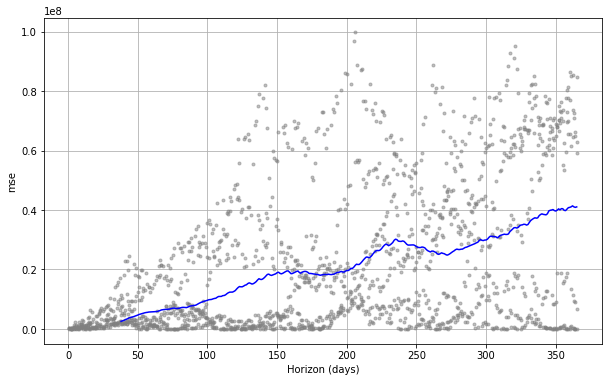

In [30]:
#we can plot the above metrics
from fbprophet.plot import plot_cross_validation_metric
fig= plot_cross_validation_metric(data_cv, metric='mse');

**observation**: this is the preditions of the future dates.